© 2018 Suzy Beeler and Vahe Galstyan. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](diffusion_via_coin_flips.ipynb).
___

# Objective 

In this tutorial, we will computationally simulate the process of diffusion with "coin flips," where at each time step, the particle can either move to the left or the right, each with probability $0.5$. From here, we can see how the distance a diffusing particle travels scale with time. 

# Modeling 1-D diffusion with coin flips 

Diffusion can be understood as random motion in space caused by thermal fluctuations in the environment. In the cytoplasm of the cell different molecules undergo a 3-dimensional diffusive motion. On the other hand, diffusion on the cell membrane is chiefly 2-dimensional. Here we will consider a 1-dimensional diffusion motion to make the treatment simpler, but the ideas can be extended into higher dimensions.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


# For pretty plots
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rc(rc)

In [2]:
# Show figures in the notebook
%matplotlib notebook

To simulate the flipping of a coin, we will make use of `numpy`'s `random.uniform()` function that produces a random number between $0$ and $1$. Let's see it in action by printing a few random numbers:

In [3]:
for i in range(10):
    print(np.random.uniform())

0.0121388222704
0.361187291836
0.744295077576
0.71935224347
0.90441223642
0.271461337491
0.298076078643
0.734369992903
0.188673454384
0.6526088918


We can now use these randomly generated numbers to simulate the process of a diffusing particle moving in one dimension, where any value below $0.5$ corresponds to step to the left and any value above $0.5$ corresponds to a step to the right. Below, we keep track of the position of a particle for $1000$ steps, where each position is $+1$ or $-1$ from the previous position, as determined by the result of a coin flip.

<IPython.core.display.Javascript object>


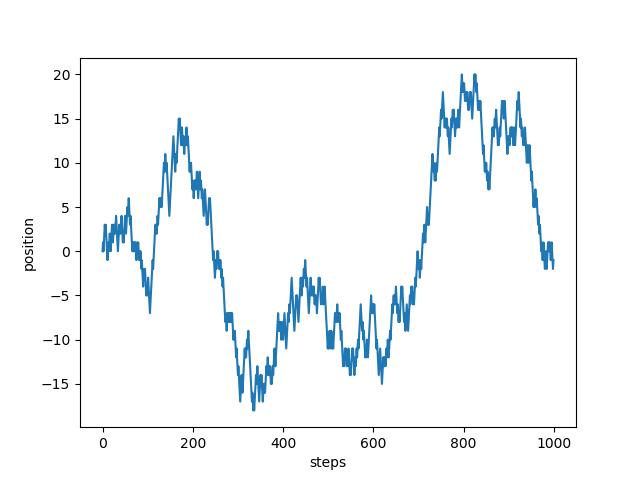

Text(0,0.5,'position')

In [4]:
#create empty figure
fig = plt.figure()

# Number of steps
n_steps = 1000

# Array to store walker positions
positions = np.zeros(n_steps)

# simulate the particle moving and store the new position
for i in range(1, n_steps):
    
    # generate random number 
    rand = np.random.uniform()
    
    # step in the positive direction 
    if rand > 0.5:
        positions[i] = positions[i-1] + 1
        
    # step in the negative direction 
    else:
        positions[i] = positions[i-1] - 1
        
# Show the trajectory
plt.plot(positions)
plt.xlabel('steps')
plt.ylabel('position')

As we can see, the position of the particle moves about the origin in an undirected fashion as a result of the randomness of the steps taken. However, it's hard to conclude anything from this single trace. Only by simulating many of these trajectories can we begin to conclude some of the scaling properties of diffusing particles. 

# Average behavior of diffusing particles 

Now let's generate multiple random trajectories and see their collective behavior. To do that, we will create a 2-dimensional `numpy` array where each row will be a different trajectory. 2D arrays can be sliced such that `[i,:]` refers to all the values in the `i`th row, and `[:,j]` refers to all the values in `j`th column. 

In [5]:
# Number of trajectories
n_traj = 1000

# 2d array for storing the trajectories
positions_2D = np.zeros([n_traj, n_steps])

# first iterate through the trajectories
for i in range(n_traj):
    
    # then iterate through the steps
    for j in range(1, n_steps):
        
        # generate random number 
        rand = np.random.uniform()

        # step in the positive direction 
        if rand > 0.5:
            positions_2D[i, j] = positions_2D[i, j-1] + 1

        # step in the negative direction 
        else:
            positions_2D[i, j] = positions_2D[i, j-1] - 1

Now let's plot the results, once again by looping. 

<IPython.core.display.Javascript object>


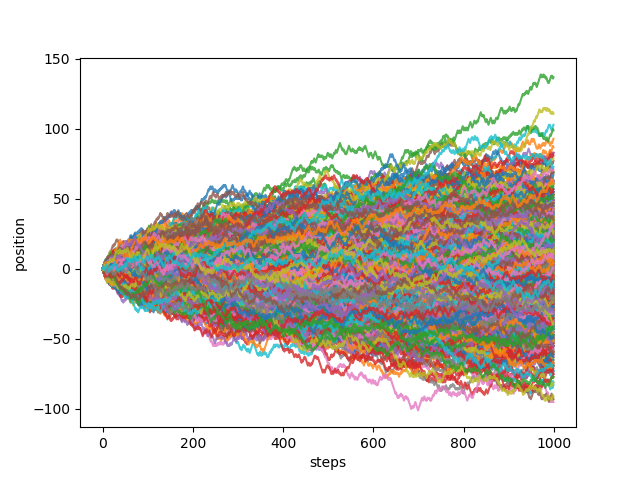

In [6]:
fig = plt.figure()

# iterate through each trajectory and plot
for i in range(n_traj):
    plt.plot(positions_2D[i,:], alpha=0.8)
    
# label
plt.xlabel('steps')
plt.ylabel('position');

The overall tendency is that the average displacement from the origin increases with the number of time steps. Because each trajectory is assigned a solid color and all trajectories are overlaid on top of each other, it's hard to see the distribution of the walker position at a given number of times steps. To get a better intuition about the distribution of the walker's position at different steps, we will assign the same color to each trajectory and add transparency to each of them so that the more densely populated regions have a darker color.

<IPython.core.display.Javascript object>


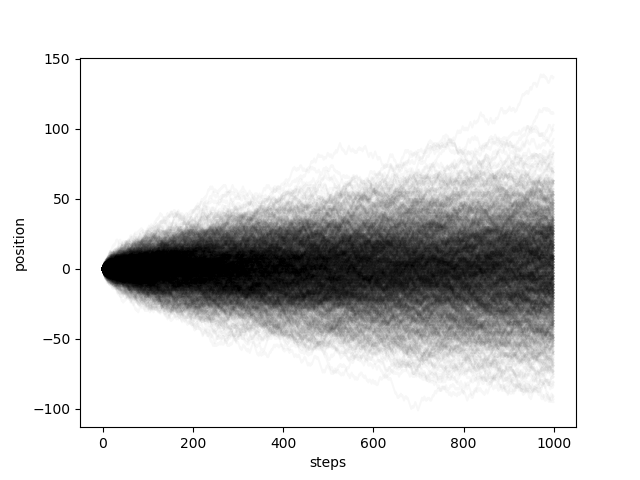

In [7]:
fig = plt.figure()

# iterate through each trajectory and plot
for i in range(n_traj):
    # lower alpha corresponds to lighter lines 
    plt.plot(positions_2D[i,:], alpha=0.03, color='k')

# label
plt.xlabel('steps')
plt.ylabel('position');

As we can see, over the course of diffusion the distribution of the walker's position becomes wider but remains centered around the origin, indicative of the unbiased nature of the random walk. To see how the walkers are distributed at this last time point, let's make a histogram of the walker's final positions.

<IPython.core.display.Javascript object>


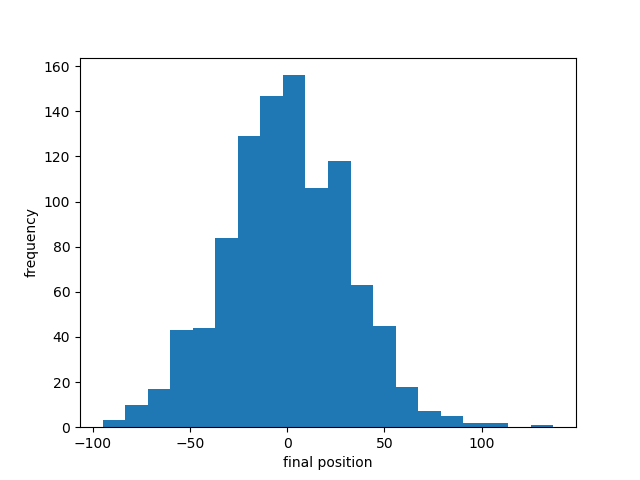

In [8]:
fig = plt.figure()

# Make a histogram of final positions
_ = plt.hist(positions_2D[:,-1], bins=20)
plt.xlabel('final position')
plt.ylabel('frequency');

As expected, the distribution is centered around the origin and has a Gaussian-like shape. The more trajectories we sample, the "more Gaussian" the distribution will become. However, we may notice that the distribution appears to change depending on the number of bins we choose. This is known as *bin bias* and doesn't reflect anything about our data itself, just how we choose to represent it. An alternative (and arguably better) way to present the data is as a *empirical cumulative distribution function* (or ECDF), where we don't specify a number of bins, but instead plot each data point. For our cumulative frequency distribution, the $x$-axis corresponds to the final position of a particle  and the $y$-axis corresponds to the proportion of particles that ended at this position or a more negative position.

<IPython.core.display.Javascript object>


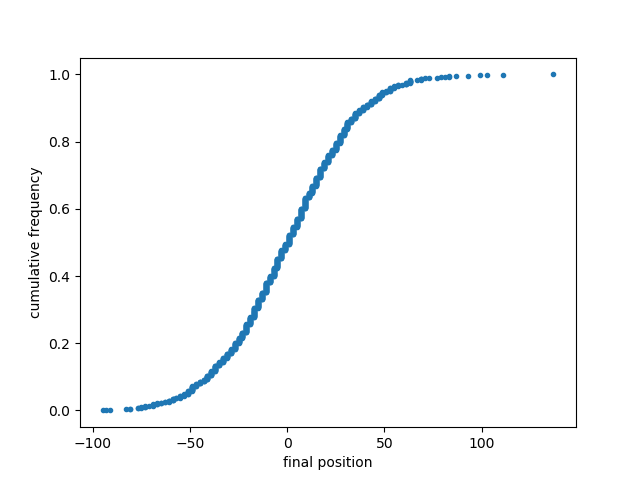

In [9]:
plt.figure()

# sort the final positions 
sorted_positons = np.sort(positions_2D[:,-1])
# make the corresponding y_values (i.e. percentiles)
y_values = np.linspace(start=0, stop=1, num=len(sorted_positons))

# plot the cumulative histogram
plt.plot(sorted_positons, y_values, '.')
plt.xlabel("final position")
plt.ylabel("cumulative frequency");

This way of visualizing the data makes it easier to tell that distribution of walkers is in fact symmetric around 0. That is, 50% of the walkers ended on a negative position, while 50% of the walkers ended on a positive position. 

# Mean squared displacement (MSD)

From visual inspection we could tell that the particles tend to go further away from the origin as the number of steps increases. To get a more quantitative understanding of  the particles' positions, we can compute something known as the *mean squared displacement* or MSD. This serves as a metric of how far the particles have traveled from the origin that is invariant to the direction the particle moved. Let's plot the how the mean squared displacement scales with the number of steps. 

<IPython.core.display.Javascript object>


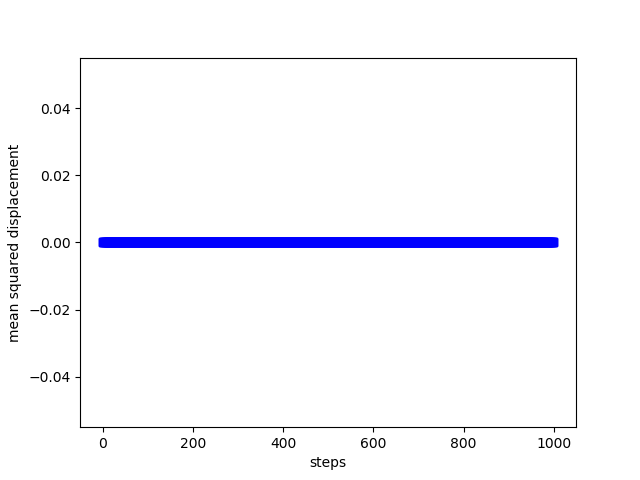

In [10]:
# array for storing the MSD
MSDs = np.empty(n_steps)

# calculate the MSDs for each step

##THIS IS FOR YOU TO DO!!
    
# Plot the MSD
fig = plt.figure()
plt.plot(MSDs,'-bs')
plt.xlabel('steps')
plt.ylabel('mean squared displacement');

We see that the mean squared displacement clearly increases linearly with the number of steps. This leads to the important result that for diffusion, the time it takes to reach a certain distance scales with the square of that distance. This means that by diffusion, it will take 4 times as long to travel twice the distance. This is in contrast to ballistic motion (like a car driving on a freeway), where the time to travel scales linearly with the distance.

This result leads us to the relationship that the time $t$ it takes to diffuses scales with $\frac{L^2}{D}$, where $L$ is the length and $D$ is the diffusion coefficient. Let's explore this relationship by plotting $t$ vs. $L$ for length scales relevant to biology, like $1$ µm (i.e. an *E. coli*) to $1$ m (i.e. the longest neuron in the human body). We will do this for $D = 10 \, \mu m^2/\text{sec}$, which is typical for a protein in cytoplasm. 